# Environment
Track will be generated at random.

* Observation space:- 96x96 pixels
* Action space:- If continuous: There are 3 actions: steering (-1 is full left, +1 is full right), gas, and breaking. If discrete: There are 5 actions: do nothing, steer left, steer right, gas, brake.
* Rewards:- The reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles visited in the track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.
* Episode termination:- The episode finishes when all of the tiles are visited. The car can also go outside of the playfield - that is, far off the track, in which case it will receive -100 reward and die.

In [1]:
import gym
from stable_baselines3.ppo import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np

In [6]:
# Get the environment
env = gym.make('CarRacing-v0')

# Wrap with monitor
env = Monitor(env, filename='car_logs')

In [7]:
env.spec.reward_threshold

900

In [8]:
# Get the model
model = PPO(MlpPolicy, env, verbose=0, device='cuda')

In [5]:
# Define the evaluation function
def eval_model(mdl, env_in, num_eval=50):
    eps_rewards, eps_lengths = evaluate_policy(mdl, env=env_in, n_eval_episodes=num_eval, return_episode_rewards=True)
    print('Mean reward', np.mean(eps_rewards))
    print('Std reward', np.std(eps_rewards))
    print('Mean episode length', np.mean(eps_lengths))

In [9]:
# Train the model
model.learn(total_timesteps=1e5)

Track generation: 1112..1394 -> 282-tiles track
Track generation: 1220..1532 -> 312-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1184..1491 -> 307-tiles track
Track generation: 1124..1406 -> 282-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1203..1508 -> 305-tiles track
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1107..1395 -> 288-tiles track
Track generation: 1144..1434 -> 290-tiles track
Track generation: 1256..1574 -> 318-tiles track
Track generation: 1338..1677 -> 339-tiles track
Track generation: 1131..1418 -> 287-tiles track
Track generation: 1197..1500 -> 303-tiles track
Track generation: 974..1225 -> 251-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1187..1488 -> 301-tiles track
Track generation: 1140..1429 -> 289-tiles

In [13]:
# Evaluate the model
eval_model(model, env, num_eval=10)

Track generation: 1224..1534 -> 310-tiles track
Track generation: 1149..1440 -> 291-tiles track
Track generation: 1224..1534 -> 310-tiles track
Track generation: 1108..1389 -> 281-tiles track
Track generation: 1344..1693 -> 349-tiles track
Track generation: 1146..1445 -> 299-tiles track
Track generation: 1089..1365 -> 276-tiles track
Track generation: 1136..1424 -> 288-tiles track
Track generation: 1231..1543 -> 312-tiles track
Track generation: 1275..1598 -> 323-tiles track
Track generation: 1148..1448 -> 300-tiles track
Mean reward -83.4184138
Std reward 1.0933187754311908
Mean episode length 1000.0


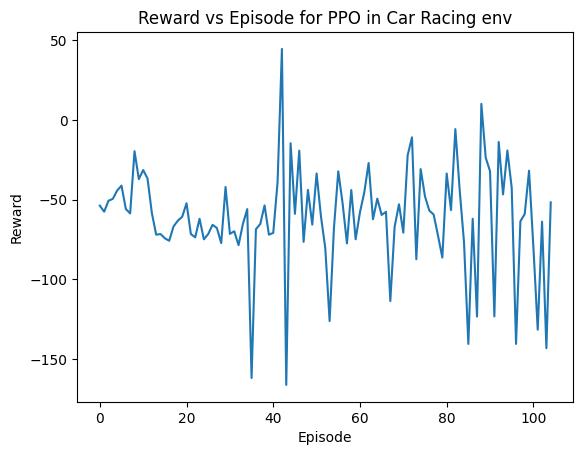

In [10]:
import matplotlib.pyplot as plt

eps_rew = env.get_episode_rewards()
plt.plot(range(len(eps_rew)), eps_rew)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode for PPO in Car Racing env')
plt.show()

In [15]:
print(len(eps_rew))

10
